# FE 595 Financial Technology - Final project

## Text Analysis of SEC Filings

**Contributors:** Diyan Rahaman, Jyotsna Ramaswamy

In this project we try to study the effect if any of financial reports filed by companies to the Securities and Exchange Commission (SEC), on the consequent returns for that year. We studied the Annual 10-K earnings reports for 500 of the companies that make up the S&P 500 using filings downloadedfrom the SEC's Electronic Data Gathering, Analysis and Retrieval (EDGAR) website [1] from 2008 to 2018. We analyzed the sentiment expressed in the Risk Section (Item 1A.) and tried to correlate it with the quarterly returns observed in the year the report is filed.

## Background

The initial hypothesis that the information contained in financial reports required by the SEC for publicly traded firms in the United States provided can be used to predict subsequent price movements was made in a paper called Lazy Prices (NBER Working Paper No. 25084) by Lauren Cohen, Christopher Malloy, and Quoc Nguyen [2]. In this paper, they study the language and construction of all financial reports required by the SEC for publicly traded firms in the United States over the two decades beginning in 1995. They construct portfolios of firms that had few textual changes in quarter-to-quarter reports and firms that had many changes, and find that portfolios that were long "non-changers" and short "changers" earned a statistically significant value-weighted abnormal return of between 34 and 58 basis points per month—between 4 and 7 percent per year—over the following year [3].

## Approach

In our project we approached this task in the following way:

1. Get a list of companies that comprises the S&P 500 Index from the Wiki website [4], using code in `wiki.py` file to webscrape the table containing the components and get a list containing the company name, ticker symbol and CIK (Central Index Key) assigned to the company by the SEC. This list is saved off to a file called `sp500.csv` to be used in later processing.

2. For each CIK in the list of 500 companies that comprises the S&P 500 we pull the Risk Section (Item 1A.) from 10-K filings which have been downloaded previously from 10-K filings by Bill McDonald [5]. The text filings are processed using code in `sec.py` to read the file, clean it of unicode characters and extract the Risk Section. The period studied is between 2008 and 2018 and the resulting sentiments for each company for each filing year is saved off to a file called `sentiments.csv` for further processing.

3. For each company and year for which a risk sentiment has been determined, we use the code in `yahoofin.py` to get the price history of the company using their ticker symbol for a given year and calculating the quarterly returns that would result at the end of each quarter. All this data, along with the original sentiment data is now saved to a file called `results.csv` which will be analyzed further.

4. Finally we download the price history for the SPY ETF fund as a benchmark for the S&P 500 Index as a whole, so we can compare the quarterly returns of various companies with positive/negative sentiments with that of the quarterly returns of the benchmark fund. The results of this data is saved to a file called `spy.csv` for later analysis.


## Analysis of Data

### 1. Load the results data and remove any rows with missing data

Load the results data from `results.csv` file into a pandas dataframe and remove any rows that have missing data (where sentiment is 0)

In [1]:
import pandas as pd

resdata = pd.read_csv(r".\Data\results.csv")
results = resdata[resdata.Sentiment != 0]
results = results.dropna()
results.head()

,Name,Symbol,CIK,Year,Sentiment,Q1,Q2,Q3,Q4
0,Dollar Tree,DLTR,935703,2018,0.046410,-0.126875,-0.217959,-0.249701,-0.192842
1,Dollar Tree,DLTR,935703,2017,0.046967,0.013041,-0.097224,0.120981,0.385539
2,Dollar Tree,DLTR,935703,2016,0.049301,0.046314,0.195787,0.001523,-0.020683
3,Dollar Tree,DLTR,935703,2015,0.032298,0.153518,0.122814,-0.052452,0.103341
4,Dollar Tree,DLTR,935703,2014,0.038498,-0.074823,-0.034397,-0.005851,0.253546


### 2. Exploratory Analysis

See if any linear relationship exists between the sentiments and the quarterly returns.

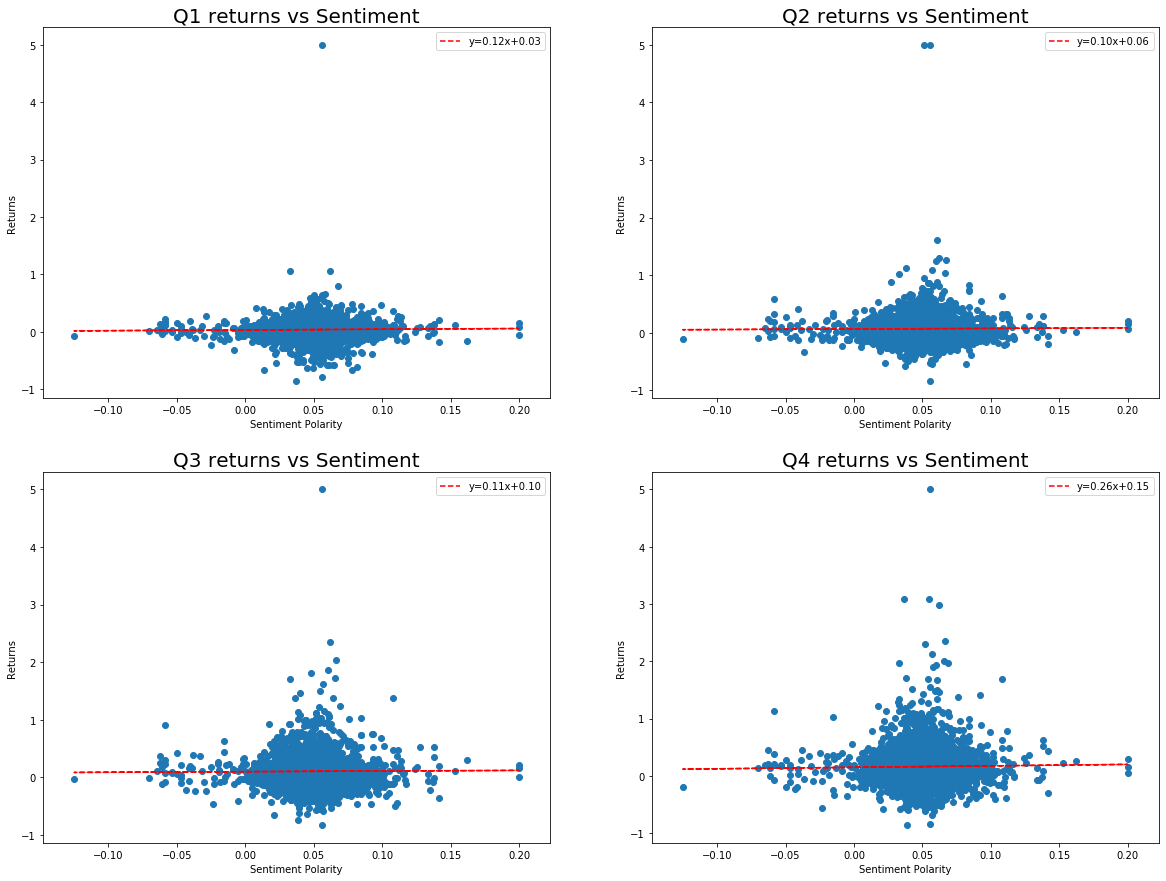

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 15))

lm1 = LinearRegression().fit(np.array(results["Sentiment"]).reshape(-1,1), 
                             np.array(results["Q1"]).reshape(-1,1))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1.scatter(results["Sentiment"], results["Q1"])
ax1.plot(results["Sentiment"], lm1.predict(np.array(results["Sentiment"]).reshape(-1,1)),"r--", 
         label=f'y={lm1.coef_[0][0]:.2f}x+{lm1.intercept_[0]:.2f}')
ax1.set_title('Q1 returns vs Sentiment', fontsize=20)
ax1.set_xlabel("Sentiment Polarity")
ax1.set_ylabel("Returns")
ax1.legend()

lm2 = LinearRegression().fit(np.array(results["Sentiment"]).reshape(-1,1), 
                             np.array(results["Q2"]).reshape(-1,1))
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2.scatter(results["Sentiment"], results["Q2"])
ax2.plot(results["Sentiment"], lm2.predict(np.array(results["Sentiment"]).reshape(-1,1)),"r--", 
         label=f'y={lm2.coef_[0][0]:.2f}x+{lm2.intercept_[0]:.2f}')
ax2.set_title('Q2 returns vs Sentiment', fontsize=20)
ax2.set_xlabel("Sentiment Polarity")
ax2.set_ylabel("Returns")
ax2.legend()

lm3 = LinearRegression().fit(np.array(results["Sentiment"]).reshape(-1,1), 
                             np.array(results["Q3"]).reshape(-1,1))
ax3 = plt.subplot2grid((2, 2), (1, 0))
ax3.scatter(results["Sentiment"], results["Q3"])
ax3.plot(results["Sentiment"], lm3.predict(np.array(results["Sentiment"]).reshape(-1,1)),"r--", 
         label=f'y={lm3.coef_[0][0]:.2f}x+{lm3.intercept_[0]:.2f}')
ax3.set_title('Q3 returns vs Sentiment', fontsize=20)
ax3.set_xlabel("Sentiment Polarity")
ax3.set_ylabel("Returns")
ax3.legend()

lm4 = LinearRegression().fit(np.array(results["Sentiment"]).reshape(-1,1), 
                             np.array(results["Q4"]).reshape(-1,1))
ax4 = plt.subplot2grid((2, 2), (1, 1))
ax4.scatter(results["Sentiment"], results["Q4"])
ax4.plot(results["Sentiment"], lm4.predict(np.array(results["Sentiment"]).reshape(-1,1)),"r--", 
         label=f'y={lm4.coef_[0][0]:.2f}x+{lm4.intercept_[0]:.2f}')
ax4.set_title('Q4 returns vs Sentiment', fontsize=20)
ax4.set_xlabel("Sentiment Polarity")
ax4.set_ylabel("Returns")
ax4.legend()

plt.show()

### 3. Companies with best and worst sentiments

Here we anlyze only the 10 best and 10 worst companies in terms of their sentiment and see how their avearge returns are for each quarter.

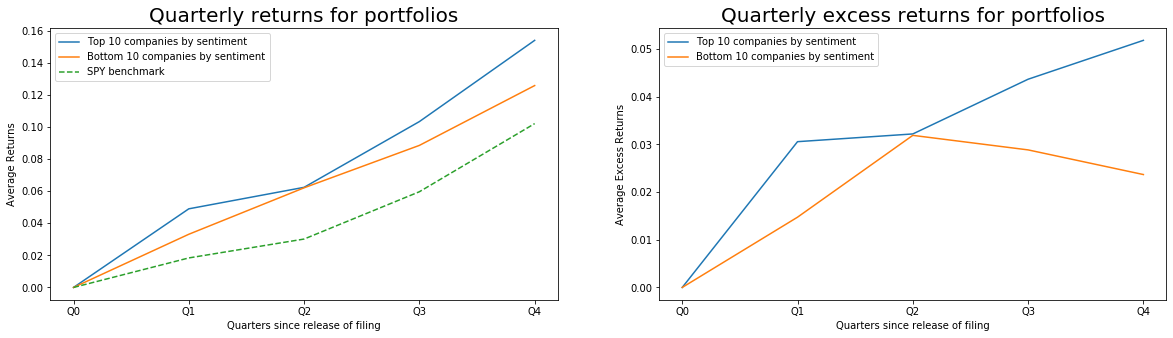

In [3]:
top10res = results.groupby("Year").apply(lambda x: x.nlargest(10, "Sentiment"))[['Q1','Q2','Q3','Q4']]
top10ret = top10res.groupby('Year').mean()
top10ret.insert(0,"Q0", 0.0)

bot10res = results.groupby("Year").apply(lambda x: x.nsmallest(10, "Sentiment"))[['Q1','Q2','Q3','Q4']]
bot10ret = bot10res.groupby('Year').mean()
bot10ret.insert(0,"Q0", 0.0)

spydata = pd.read_csv(r".\Data\spy.csv")
spyret = spydata.groupby("Year")[['Q1','Q2','Q3','Q4']].mean()
spyret.insert(0,"Q0", 0.0)

fig = plt.figure(figsize=(20, 5))

ax1 = plt.subplot2grid((1, 2), (0, 0))
ax1.plot(top10ret.mean(), label='Top 10 companies by sentiment')
ax1.plot(bot10ret.mean(), label='Bottom 10 companies by sentiment')
ax1.plot(spyret.mean(), '--', label='SPY benchmark')
ax1.set_title('Quarterly returns for portfolios', fontsize=20)
ax1.set_xlabel('Quarters since release of filing')
ax1.set_ylabel('Average Returns')
ax1.legend()

ax2 = plt.subplot2grid((1, 2), (0, 1))
ax2.plot(top10ret.mean()-spyret.mean(), label='Top 10 companies by sentiment')
ax2.plot(bot10ret.mean()-spyret.mean(), label='Bottom 10 companies by sentiment')
ax2.set_title('Quarterly excess returns for portfolios', fontsize=20)
ax2.set_xlabel('Quarters since release of filing')
ax2.set_ylabel('Average Excess Returns')
ax2.legend()

plt.show()

## Conclusion

### Observations

In our project we observed the following results:

* Most companies have a slightly positive sentiment expressed in their Risk Factors section of their annual 10-K filings with the SEC. 

* The returns for each quarter following a 10-K filings shows a very slight linear correlation with the polarity of the sentiment expressed in the filing.

* The variance in the actual returns is too high to make any valid predictions based on the sentiment expressed in the Risk Factors section of the filings.

Taking a portfolio of stocks as being the top 10 showing the most positive sentiment and the bottom 10 showing the most negative sentiment we observed the following:

* The tope 10 stocks seem to out perform the bottom 10 stocks for returns at the end of the 1st and 4th quarters after the release of the filing.

* The stocks at the top and bottom of the sentiment values on average do better than the overall index for all 500 stock components of the S&P 500.

* The bottom 10 companies with the lowest sentiments show the least amount of variability in their price performance after the release of the filing, while the top 10 stocks in a given year show a boost in prices in the 1st quarter that then dips back in the 2nd quarter and then recovers by the end of the year to outperform the bottom 10 stocks on average.

### Further Study

There is scope for further study of the SEC filings made by companies and their correlation with subsequent returns:

1. Consider additional measures of sentiment such as Uncertainty and Litigiousness as defined by Loghran and McDonald [6].

2. Consider changes in the filings from period to period for the same company. In "Lazy Prices" by Cohen, Malloy and Nguyen [2] define at least 4 different similarity measures:

    + Cosine Similarity, 
    + Jacaard Similarity, 
    + Minimum Edit Distance and 
    + Simple Changes. 


3. Consider the sentiments and changes expressed by other sections of the 10-K filings such as the following:

    + Item 1 Business 
    + Item 1A Risk Factors 
    + Item 2 Properties 
    + Item 3 Legal Proceedings 
    + Item 4 Mine Safety Disclosures 
    + Item 5 Market for Registrant’s Common Equity, Related Stockholder Matters and Issuer Purchases of Equity Securities 
    + Item 6 Selected Financial Data 
    + Item 7 Management’s Discussion and Analysis of Financial Condition and Results of Operations 
    + Item 7A Quantitative and Qualitative Disclosures About Market Risk 
    + Item 8 Financial Statements and Supplementary Data 
    + Item 9 Changes in and Disagreements With Accountants on Accounting and Financial Disclosure 
    + Item 9A Controls and Procedures 
    + Item 9B Other Information 
    + Item 10 Directors, Executive Officers and Corporate Governance 
    + Item 11 Executive Compensation 
    + Item 12 Security Ownership of Certain Beneficial Owners and Management and Related Stockholder Matters 
    + Item 13 Certain Relationships and Related Transactions, and Director Independence 
    + Item 14 Principal Accounting Fees and Services 


4. Use all of the above factors as input variables to a Machine Learning model to try and predict the subsequent price of the company stock in the days, months, quarters, years following the release of the SEC filing being studied.


## Bibliography

[1] **https://www.sec.gov/edgar/**

[2] **Cohen, Lauren, Malloy, Christopher, Nguyen, Quoc**, "Lazy Prices", _Working Paper 25084, NATIONAL BUREAU OF ECONOMIC RESEARCH_, (2018).

[3] **Are Investors Inattentive to SEC-Mandated Corporate Reports?**, _Digest, NATIONAL BUREAU OF ECONOMIC RESEARCH_, (November 2018).

[4] **https://en.wikipedia.org/wiki/List_of_S%26P_500_companies**

[5] **https://sraf.nd.edu/data/stage-one-10-x-parse-data/**

[6] **Loughran, Tim, and Bill McDonald**, "When Is a Liability Not a Liability? Textual Analysis, Dictionaries, and 10-Ks", _Journal of Finance 66, 35—65_, (2011).